<a href="https://cognitiveclass.ai"><img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DL0101EN-SkillsNetwork/images/IDSN-logo.png" width="400"> </a>

# Activation Functions and Vanishing Gradients

Estimated time needed: **20** mins


## Introduction


In this lab, we will explore two different types of activations functions and see their corresponding derivatives or the gradients.


## Objective for this notebook
* Define sigmoid activation function and its derivative
* Define ReLu activation function and its derivative
* Calculate the Sigmoid and ReLU activations and their derivatives for a range of input values
* Plot the output values


# Recap


From the videos, we have learnt that different activation functions have different type of characteristic output curves. And, the corresponding gradient values or their derivatives are also different. In certain cases, with higher input values, the derivative starts to reach to zero, vausing vanishing gradient problem. In this lab, we compare "Sigmoid" and "ReLU" activation functions and explore their derivatives for vanishing gradients.

__Sigmoid Activation Function__
* The sigmoid function transforms input values into a range between 0 and 1
* Produces an "S-shaped" curve, making it suitable for probabilistic outputs or binary classification tasks.
* Continuous, differentiable, and monotonically increasing across its domain (-∞, +∞).
* Its derivative is simple to compute: σ′(z)=σ(z)⋅(1−σ(z)). This is essential for backpropagation.
* Useful for output layers where probabilities are required (e.g., logistic regression).
* Enables non-linear decision boundaries, allowing neural networks to learn complex relationships.

  __Limitations__
    * Suffers from the vanishing gradient problem: For large positive or negative inputs, the gradient approaches zero, slowing down learning in deep networks.
    * Computationally expensive due to the exponential operation involved.


__ReLU (Rectified Linear Unit) Activation Function__

* ReLU outputs the maximum of zero and the input value using f(x)=max⁡(0,x)f(x)=max(0,x).
* Non-linear but simpler than sigmoid; it outputs zero for negative inputs and the input value for positive inputs.
* The derivative is straightforward: f′(x)=1f′(x)=1 for x>0x>0, and f′(x)=0f′(x)=0 for x≤0x≤0.
* Mitigates the vanishing gradient problem by maintaining a constant gradient (1) for positive inputs, enabling faster convergence in deep networks.
* Computationally efficient due to its simplicity.

  __Limitations__

    * Can lead to "dead neurons," where neurons output zero consistently due to negative inputs. This can be mitigated using variants like Leaky ReLU.


### Installing Required Libraries


The following required libraries are __not__ pre-installed in the Skills Network Labs environment. __You will need to run the following cell__ to install them:


In [1]:
!pip install numpy==2.0.2
!pip install matplotlib==3.9.2

   ---------------------------------------- 0.0/15.6 MB ? eta -:--:--
    --------------------------------------- 0.3/15.6 MB ? eta -:--:--
   - -------------------------------------- 0.5/15.6 MB 2.8 MB/s eta 0:00:06
   -- ------------------------------------- 0.8/15.6 MB 2.0 MB/s eta 0:00:08
   --- ------------------------------------ 1.3/15.6 MB 1.6 MB/s eta 0:00:10
   ---- ----------------------------------- 1.6/15.6 MB 1.5 MB/s eta 0:00:10
   ---- ----------------------------------- 1.8/15.6 MB 1.5 MB/s eta 0:00:10
   ----- ---------------------------------- 2.1/15.6 MB 1.5 MB/s eta 0:00:09
   ------ --------------------------------- 2.6/15.6 MB 1.6 MB/s eta 0:00:09
   -------- ------------------------------- 3.1/15.6 MB 1.7 MB/s eta 0:00:08
   -------- ------------------------------- 3.4/15.6 MB 1.7 MB/s eta 0:00:08
   ---------- ----------------------------- 3.9/15.6 MB 1.7 MB/s eta 0:00:07
   ----------- ---------------------------- 4.5/15.6 MB 1.8 MB/s eta 0:00:07
   ----------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.0.2 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.0.2 which is incompatible.


   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   - -------------------------------------- 0.5/15.5 MB 4.2 MB/s eta 0:00:04
   --- ------------------------------------ 1.3/15.5 MB 4.0 MB/s eta 0:00:04
   ------ --------------------------------- 2.4/15.5 MB 4.2 MB/s eta 0:00:04
   --------- ------------------------------ 3.7/15.5 MB 4.7 MB/s eta 0:00:03
   ------------ --------------------------- 4.7/15.5 MB 4.8 MB/s eta 0:00:03
   -------------- ------------------------- 5.8/15.5 MB 4.8 MB/s eta 0:00:03
   ------------------ --------------------- 7.1/15.5 MB 5.0 MB/s eta 0:00:02
   -------------------- ------------------- 8.1/15.5 MB 4.9 MB/s eta 0:00:02
   ----------------------- ---------------- 9.2/15.5 MB 5.0 MB/s eta 0:00:02
   --------------------------- ------------ 10.5/15.5 MB 5.1 MB/s eta 0:00:01
   ----------------------------- ---------- 11.5/15.5 MB 5.0 MB/s eta 0:00:01
   --------

## Import required libraries
Let's start with importing the required libraries: Numpy , for matrix calculations
and matplotlib for visualization


In [2]:
import numpy as np
import matplotlib.pyplot as plt

#### Define the sigmoid activation function


In [3]:
# Sigmoid function and its derivatives
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

#### Define Sigmoid derivative, "the sigmoid gradient"


In [4]:
def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

#### Define the ReLU function


In [5]:
def relu(z):
    return np.maximum(0, z)

#### Define the ReLU derivative (ReLU gradient)


Let's create a function **relu_derivative** to get the output of the Relu derivative (gradient) 
The function would take a value $z$ and give the corresponding relu derivative by returning the value **1** for all $z$ greater than 0. 


In [6]:
### type your answer here
def relu_derivative(z):
    return np.where(z > 0, 1, 0)

#### Define the number of input values
Generate 400 synthetic values between -10 and 10. The gradient would be calculated for each of these values.


In [8]:
# Generate a range of input values
z = np.linspace(-10, 10, 400)

Next, let's compute the derivatives for Sigmoid and Relu activations and assign the values to 
**sigmoid_grad** and **relu_grad** respectively 


In [9]:
### type your answer here
sigmoid_grad = sigmoid_derivative(z)
relu_grad = relu_derivative(z)

Awesome! So now, let's visualize the sigmoid and relu activations and their gradients by plotting their output values


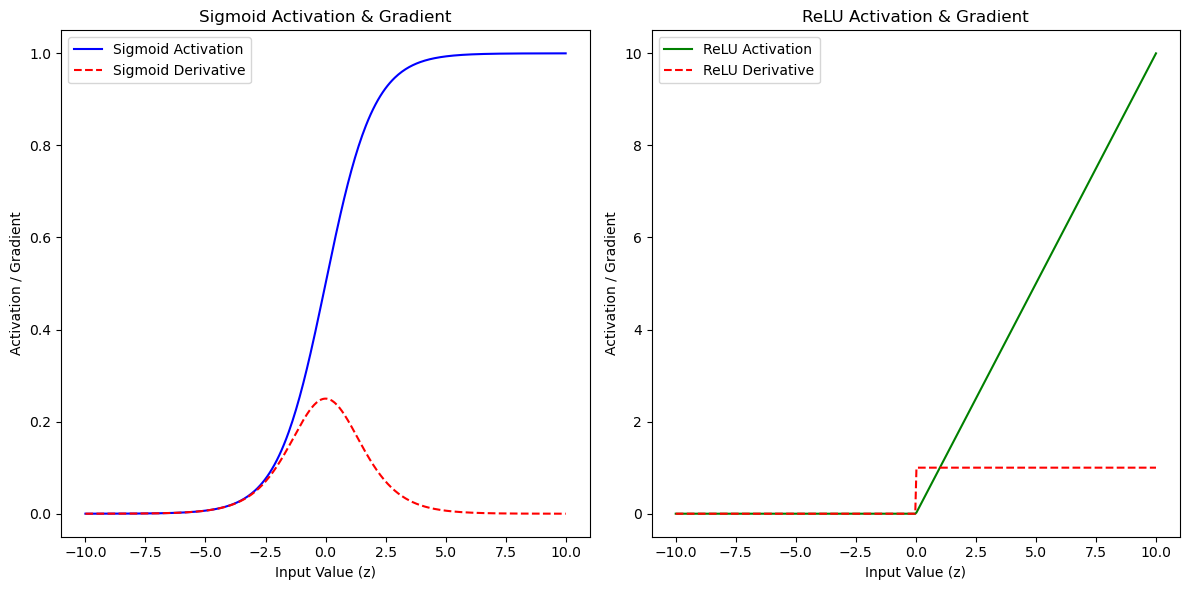

In [10]:
# Plot the activation functions
plt.figure(figsize=(12, 6))

# Plot Sigmoid and its derivative
plt.subplot(1, 2, 1)
plt.plot(z, sigmoid(z), label='Sigmoid Activation', color='b')
plt.plot(z, sigmoid_grad, label="Sigmoid Derivative", color='r', linestyle='--')
plt.title('Sigmoid Activation & Gradient')
plt.xlabel('Input Value (z)')
plt.ylabel('Activation / Gradient')
plt.legend()

# Plot ReLU and its derivative
plt.subplot(1, 2, 2)
plt.plot(z, relu(z), label='ReLU Activation', color='g')
plt.plot(z, relu_grad, label="ReLU Derivative", color='r', linestyle='--')
plt.title('ReLU Activation & Gradient')
plt.xlabel('Input Value (z)')
plt.ylabel('Activation / Gradient')
plt.legend()

plt.tight_layout()
plt.show()

The above codes should help you understand the working and differences between Sigmoid and ReLU activation functions.


<h3>Practice Exercise 1</h3>


In this practice exercise, let's try to create the hyperbolic tangent function and it's derivative.


In [11]:
# Write your code here
def tanh(z):
    return np.tanh(z)

def tanh_derivative(z):
    return 1 - np.tanh(z) ** 2 

<h3>Practice Exercise 2</h3>


Now, let's plot and compare the output of tanH function with the ReLU function for 100 synthetic values between -5 to 5


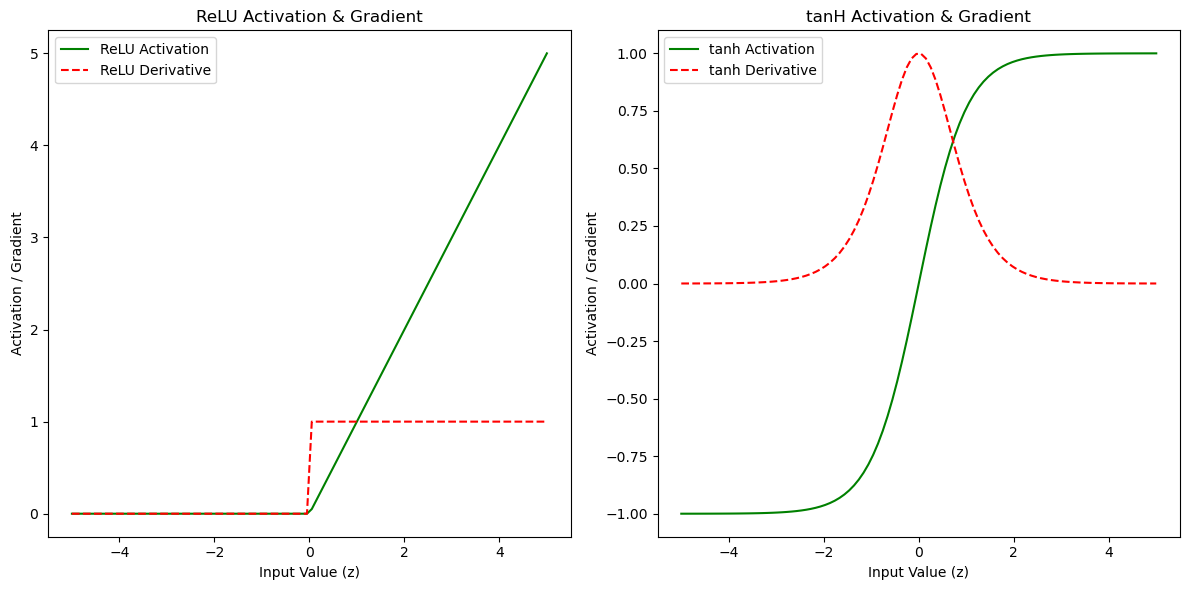

In [12]:
# Write your code here
#Generate a range of input values
z = np.linspace(-5, 5, 100)

#Get the Relu and tanH gradient values
tanh_grad = tanh_derivative(z)
relu_grad = relu_derivative(z)

#Plot the activation functions
plt.figure(figsize=(12, 6))

#Plot Relu and its derivative
plt.subplot(1, 2, 1)

#Plot Relu and its derivative
plt.subplot(1, 2, 1)
plt.plot(z, relu(z), label='ReLU Activation', color='g')
plt.plot(z, relu_grad, label="ReLU Derivative", color='r', linestyle='--')
plt.title('ReLU Activation & Gradient')
plt.xlabel('Input Value (z)')
plt.ylabel('Activation / Gradient')
plt.legend()

#Plot tanH and its derivative
plt.subplot(1, 2, 2)
plt.plot(z, tanh(z), label='tanh Activation', color='g')
plt.plot(z, tanh_grad, label="tanh Derivative", color='r', linestyle='--')
plt.title('tanH Activation & Gradient')
plt.xlabel('Input Value (z)')
plt.ylabel('Activation / Gradient')
plt.legend()

plt.tight_layout()
plt.show()

### Thank you for completing this lab!

This notebook was created by [Aman Aggarwal](https://www.linkedin.com/in/aggarwal-aman/). I hope you found this lab interesting and educational. Feel free to contact me if you have any questions!


<!--
## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2024-11-20  | 3.0  | Aman  |  Created the lab |
<hr>

## <h3 align="center"> © IBM Corporation. All rights reserved. <h3/>


## <h3 align="center"> &#169; IBM Corporation. All rights reserved. <h3/>
